importing Jupyter notebook from preprocess.ipynb


c:\Users\47476\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Melding ID                       0
Meldingstidspunkt                0
Meldingsdato                     0
Meldingsklokkeslett              0
Starttidspunkt                   0
Startdato                        0
Startklokkeslett                 0
Startposisjon bredde             0
Startposisjon lengde             0
Hovedområde start (kode)      2001
Hovedområde start             4124
Lokasjon start (kode)         2001
Havdybde start                   0
Stopptidspunkt                   0
Stoppdato                        0
Stoppklokkeslett                 0
Varighet                         0
Fangstår                         0
Stopposisjon bredde              0
Stopposisjon lengde              0
Hovedområde stopp (kode)      1962
Hovedområde stopp             4124
Lokasjon stopp (kode)         1962
Havdybde stopp                   0
Trekkavstand                    24
Redskap FAO (kode)               0
Redskap FAO                    188
Redskap FDIR (kode)            188
Redskap FDIR        

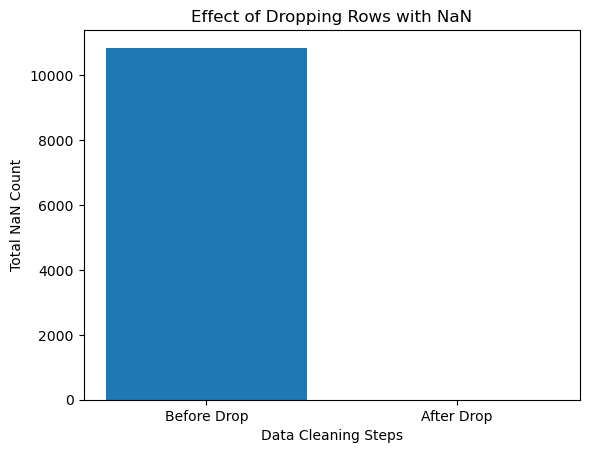

Art - FDIR
Torsk                  56507
Sei                    42495
Hyse                   39080
Lange                  17328
Uer (vanlig)           14151
                       ...  
Sagtang                    1
Annen makrell              1
Blåhval                    1
Annen laksefisk            1
Bukstripet pelamide        1
Name: count, Length: 121, dtype: int64


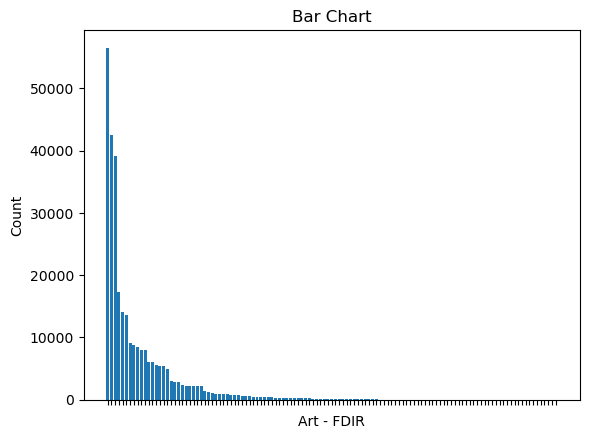

,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Art - FDIR,Rundvekt,Bredde,Fartøylengde,Month
2,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,0,8510.0,12.6,56.8,12
4,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,1,134.0,12.6,56.8,12
6,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,0,6651.0,12.6,56.8,12
9,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,1,67.0,12.6,56.8,12
12,74.883,16.056,-346.0,315.0,74.924,15.742,-496.0,10215.0,51.0,0,5097.0,12.6,56.8,12


In [1]:
import import_ipynb
from preprocess import df
df.head()

Silhouette Score: 0.4420917960384491


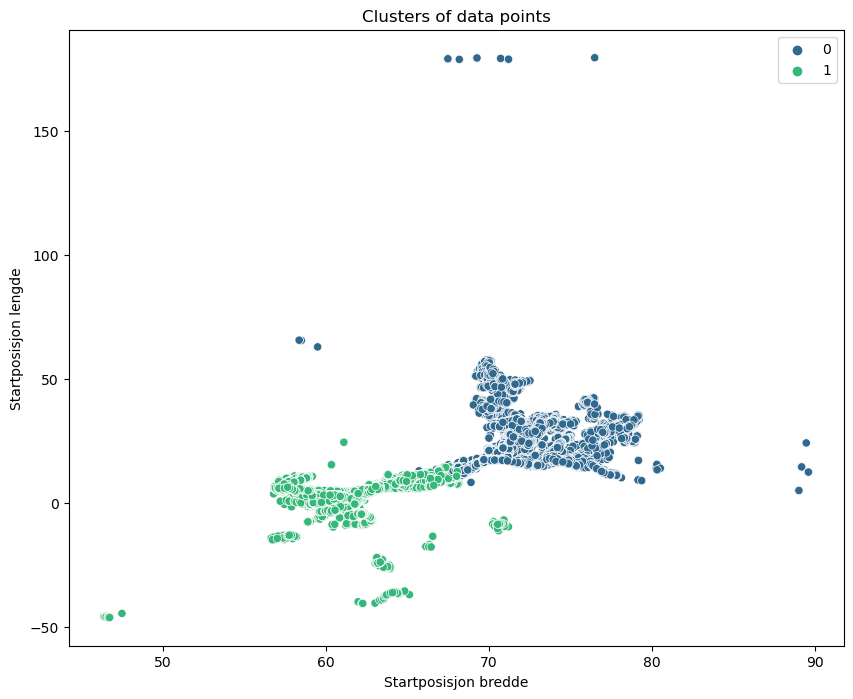

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Selecting features
features = ['Startposisjon bredde', 'Startposisjon lengde', 'Redskap FDIR (kode)', 'Rundvekt']
X = df[features]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting dataset into training and testing set
# Note: In clustering, we typically don't split the data into training and testing sets in the same way as classification
# Here, we're just scaling the data. The clustering process will be done on the entire dataset

# Creating and training the KMeans clustering model
# Assuming the us eof 3 clusters, later checked using elbow method.
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=50, random_state=16)
kmeans.fit(X_scaled)

# Making predictions
# In clustering, we don't make predictions in the same way as in classification. Instead, we assign each data point to a cluster.
labels = kmeans.labels_

# Evaluating the model
# One common way to evaluate clustering models is by using the silhouette score, which measures how similar an object is to its own cluster compared to other clusters.
silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

# Distribution of your data points across the clusters:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the clusters
# With use of StartPosisjon bredde and Startposisjon lengde its easy to visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X, x='Startposisjon bredde', y='Startposisjon lengde', hue=labels, palette='viridis')
plt.title('Clusters of data points')
plt.show()

# Using Elbow method to find the optimal amount of clusters

c:\Users\47476\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

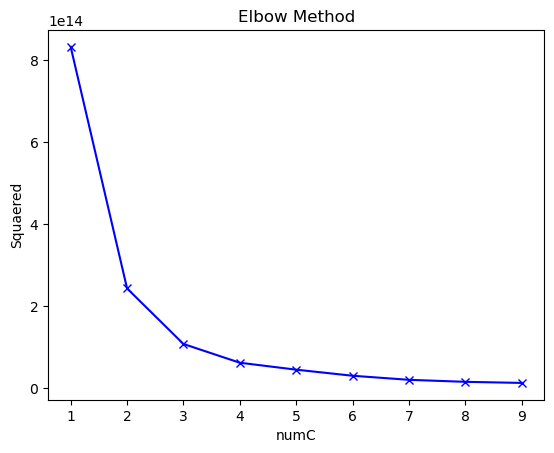

In [9]:

squared_distances = []
numC = range(1,10)
for num_clusters in numC:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    squared_distances.append(kmeans.inertia_)

plt.plot(numC, squared_distances, 'bx-')
plt.xlabel('numC') 
plt.ylabel('Squaered') 
plt.title('Elbow Method')
plt.show()

By looking at where it bends we find the optimal numbers of clusters. Which in this case is 2.

In [4]:
y_predict = kmeans.fit_predict(X_scaled)
print(y_predict)
df['cluster'] = y_predict
df.head()

[0 0 0 ... 0 0 0]


,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Art - FDIR,Rundvekt,Bredde,Fartøylengde,Month,cluster
2,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,0,8510.0,12.6,56.8,12,0
4,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,1,134.0,12.6,56.8,12,0
6,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,0,6651.0,12.6,56.8,12,0
9,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,1,67.0,12.6,56.8,12,0
12,74.883,16.056,-346.0,315.0,74.924,15.742,-496.0,10215.0,51.0,0,5097.0,12.6,56.8,12,0


In [5]:
# Count rows where 'cluster' is 0 and 'ART FDIR' is 0
count_0 = df.loc[(df['cluster'] == 0) & (df['Art - FDIR'] == 0)].shape[0]

# Count rows where 'cluster' is 1 and 'ART FDIR' is 1
count_1 = df.loc[(df['cluster'] == 1) & (df['Art - FDIR'] == 1)].shape[0]

count_01 = df.loc[(df['cluster'] == 0) & (df['Art - FDIR'] == 1)].shape[0]
count_10 = df.loc[(df['cluster'] == 1) & (df['Art - FDIR'] == 0)].shape[0]

print(f"Count where cluster is 0 and ART FDIR is 0: {count_0}")
print(f"Count where cluster is 1 and ART FDIR is 1: {count_1}")
print(f"Count where cluster is 0 and ART FDIR is 1: {count_01}")
print(f"Count where cluster is 1 and ART FDIR is 0: {count_10}")


Count where cluster is 0 and ART FDIR is 0: 39434
Count where cluster is 1 and ART FDIR is 1: 21127
Count where cluster is 0 and ART FDIR is 1: 21368
Count where cluster is 1 and ART FDIR is 0: 17073


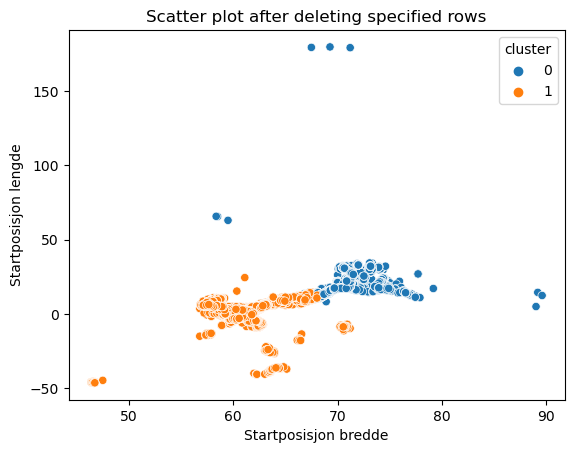

In [6]:
df_0 = df.loc[~((df['cluster'] == 1) & (df['Art - FDIR'] == 1)) & ~((df['cluster'] == 0) & (df['Art - FDIR'] == 0))]
sns.scatterplot(data=df_0, x='Startposisjon bredde', y='Startposisjon lengde', hue='cluster')
plt.title('Scatter plot after deleting specified rows')

# Displaying the scatter plot
plt.show()

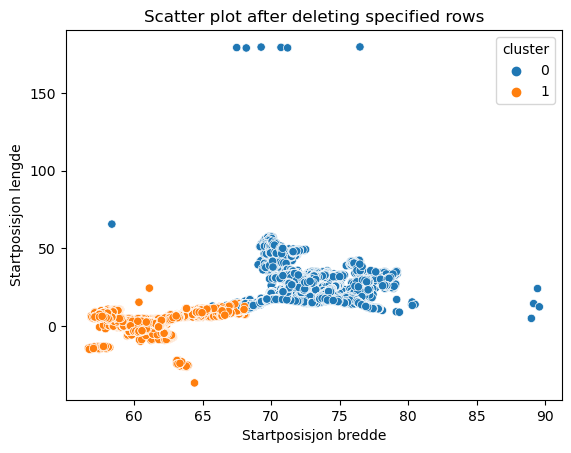

In [8]:
#Viser de som er like av art FDIR 0 og 1
df_1 = df.loc[~((df['cluster'] == 0) & (df['Art - FDIR'] == 1)) & ~((df['cluster'] == 1) & (df['Art - FDIR'] == 0))]
sns.scatterplot(data=df_1, x='Startposisjon bredde', y='Startposisjon lengde', hue='cluster')
plt.title('Scatter plot after deleting specified rows')
plt.show()

In [ ]:
df.head()

,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Art - FDIR,Rundvekt,Bredde,Fartøylengde,Month,cluster
2,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,0,8510.0,12.60,56.8,12,1
6,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,0,6651.0,12.60,56.8,12,1
12,74.883,16.056,-346.0,315.0,74.924,15.742,-496.0,10215.0,51.0,0,5097.0,12.60,56.8,12,1
17,74.931,15.785,-443.0,243.0,74.926,15.894,-358.0,3214.0,51.0,0,7022.0,12.60,56.8,12,1
20,67.826,12.967,-71.0,72.0,67.829,12.933,-54.0,1471.0,61.0,0,1800.0,5.06,19.1,1,1
